## PREDICTING CUSTOMER CHURN FOR ENHANCED RETENTION STRATEGIES AT SYRIATEL TELECOMUNICATION

### BUSINESS UNDERSTANDING

#### Business problem

To grow their revenue, telecommunication companies must attract new customers while improving retention. Customer churn, where a customer cancels their service, is a significant concern, often driven by factors like better pricing, poor service, or lack of engagement. Syriatel, a leading provider in Syria, focuses on long-term customer relationships, understanding that retaining existing clients is more cost-effective than acquiring new ones. This project aims to develop a model to predict customer churn and identify key factors, enabling Syriatel to take action to prevent it.




## Problem Statement

The goal of this project is to develop a classifier that predicts whether a customer will likely churn from SyriaTel, a telecommunications company. This binary classification task will analyze customer behavior and demographic data to identify patterns that may indicate a higher likelihood of churn. The objective is to help SyriaTel minimize the financial impact of churn by implementing proactive retention strategies. Additionally, the project aims to build a reliable churn prediction model by thoroughly examining key features based on historical company data.

## Data Understanding 

The dataset used in this project was sourced from Kaggle, specifically from the [Churn in Telecoms Dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset). It contains information related to customer behavior and their likelihood of **churning** in a telecom company.

### Key Details:
- **Number of Rows**: **3,333** (each row represents a unique customer).
- **Number of Columns**: **21** (each column represents a feature or characteristic of the customer).

### Dataset Features:
The dataset includes the following categories of features:
1. **Customer Information**:
  
2. **Account Information**:
   
3. **Usage Metrics**:
   
4. **Customer Service Interaction**:
   
5. **Target Variable**:
   


## Column Name and descriptions 

**state**: the state the user lives in  
**account length**: the number of days the user has this account  
**area code**: the code of the area the user lives in  
**phone number**: the phone number of the user  
**international plan**: true if the user has the international plan, otherwise false  
**voice mail plan**: true if the user has the voice mail plan, otherwise false  
**number vmail messages**: the number of voice mail messages the user has sent  
**total day minutes**: total number of minutes the user has been in calls during the day  
**total day calls**: total number of calls the user has done during the day  
**total day charge**: total amount of money the user was charged by the Telecom company for calls during the day  
**total eve minutes**: total number of minutes the user has been in calls during the evening  
**total eve calls**: total number of calls the user has done during the evening  
**total eve charge**: total amount of money the user was charged by the Telecom company for calls during the evening  
**total night minutes**: total number of minutes the user has been in calls during the night  
**total night calls**: total number of calls the user has done during the night  
**total night charge**: total amount of money the user was charged by the Telecom company for calls during the night  
**total intl minutes**: total number of minutes the user has been in international calls  
**total intl calls**: total number of international calls the user has done  
**total intl charge**: total amount of money the user was charged by the Telecom company for international calls  
**customer service calls**: number of customer service calls the user has done  
**churn**: true if the user terminated the contract, otherwise false

## Objectives

- **Build a machine learning model** that can accurately predict customers who are likely to churn, using the information available in the dataset.
- **Identify the important features** that contribute significantly to predicting customer churn.

# Import  the libraries 

In [464]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier


### Loading the data and data understanding


In [407]:
#Load the data 
data = pd.read_csv(r"Churn _In _Telecom.csv")


In [408]:
#Check the first 5 rows 
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [409]:
# check the shape of the data 
data.shape

(3333, 21)

In [410]:
# information about the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Data preparation 

In [411]:
# check for missing values
data.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The customers phone number is a unique identifier so I am checking for duplicates 

In [412]:
# check for duplicates using the phone number 
data.duplicated(subset='phone number').value_counts()

False    3333
Name: count, dtype: int64

This data has no missing values or duplicates 

In [413]:
# Replace false/true with 0,1
data['churn'] = data['churn'].replace({False:0, True:1})
data.head()

C:\Users\pixel\AppData\Local\Temp\ipykernel_14896\3832826713.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['churn'] = data['churn'].replace({False:0, True:1})


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## Exploratory data analysis

#### Distribution of Numeric Features in the Dataset

In [414]:
# checking for data types
data_new  = data.select_dtypes(include=['float64','int64'])

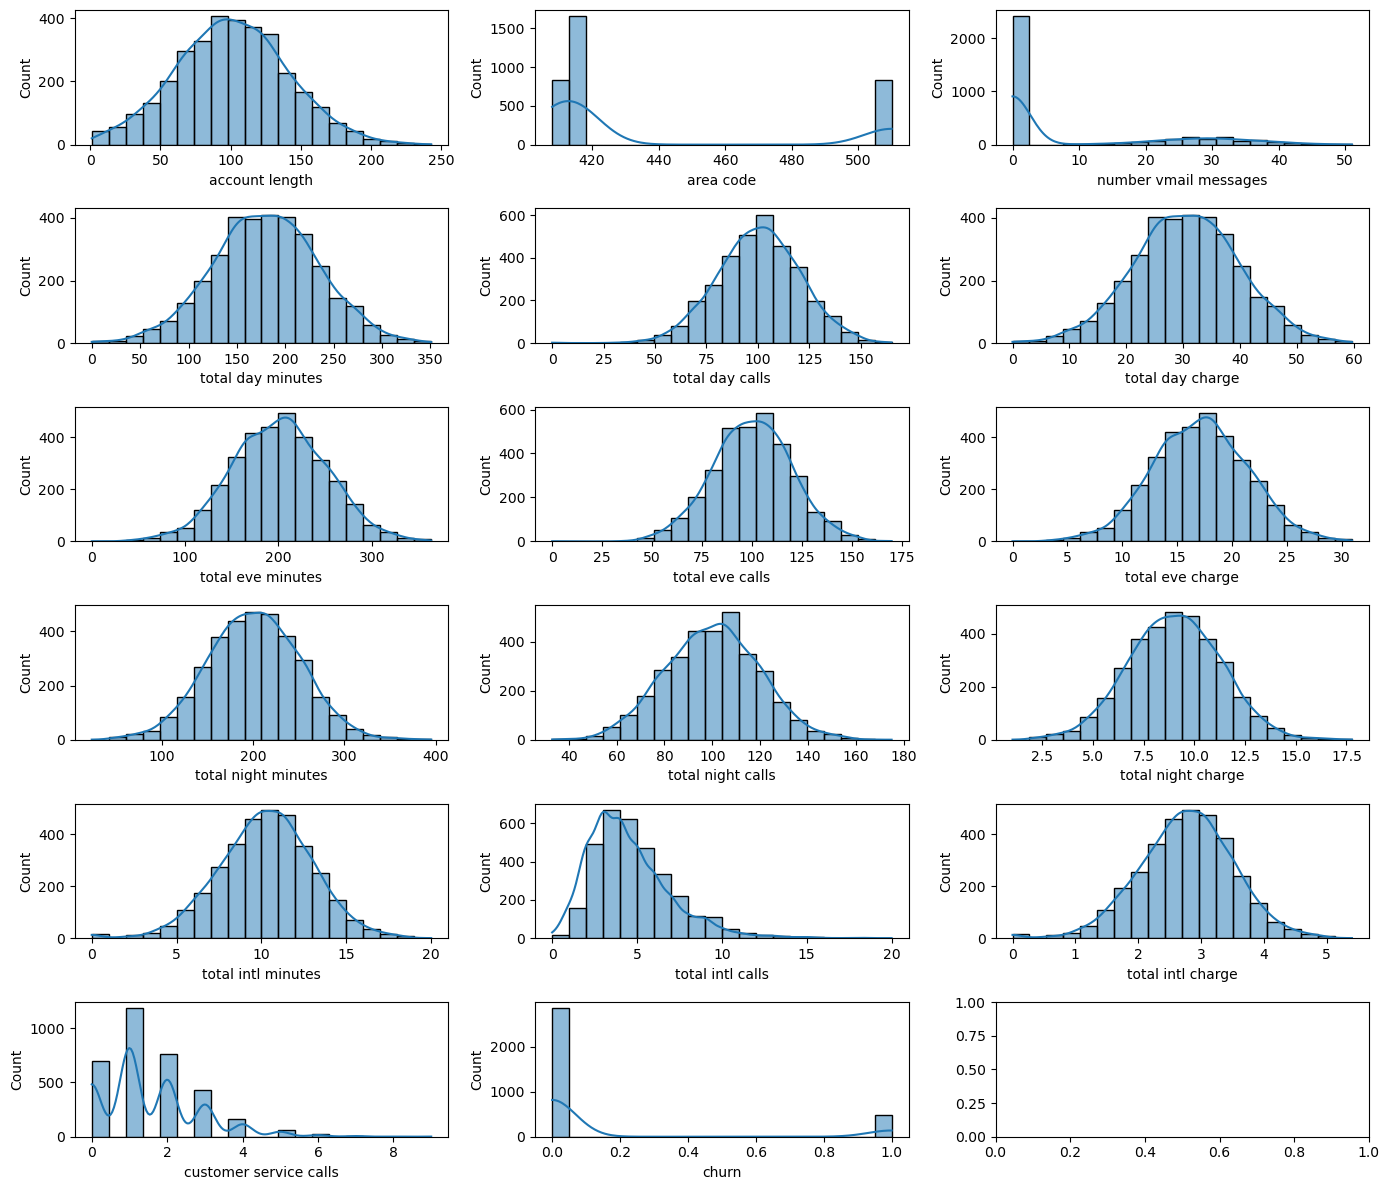

In [415]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(14, 12))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through numeric columns and plot histograms
for i, feature in enumerate(data_new):
    sns.histplot(data[feature], ax=axes[i], kde=True, bins=20)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Subsription Plan Distribution

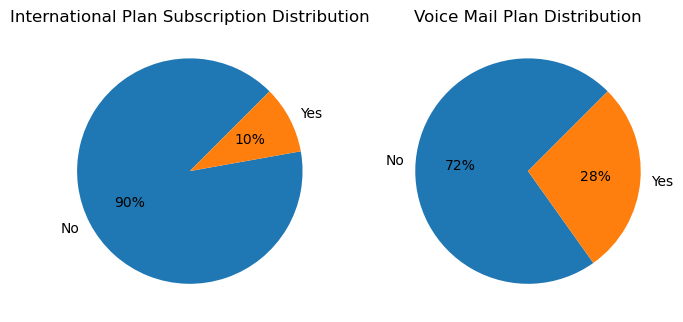

In [416]:
plt.figure(figsize=(8, 6))

# Plot the first pie chart
plt.subplot(1, 2, 1)
ax1 = data['international plan'].value_counts()
plt.pie(ax1, labels=['No', 'Yes'], autopct='%.0f%%', startangle=45)
plt.title('International Plan Subscription Distribution')

# Plot the second pie chart 
plt.subplot(1, 2, 2)
ax2 = data['voice mail plan'].value_counts()
plt.pie(ax2, labels=['No', 'Yes'], autopct='%.0f%%', startangle=45)
plt.title('Voice Mail Plan Distribution')

# Show the plot
plt.show()

The pie chart shows 
1. The first pie chart shows the distribution of the 'international plan' feature (whether customers have the international plan or not) 90% dont have the international plan while 10% have the international plan.
2. The second pie chart displays the distribution of the 'voice mail plan' feature (whether customers have the voice mail plan or not) 72% dont have Voice Mail Plan Distribution while 28 % have Voice Mail Plan Distribution.


## Minutes Distribution

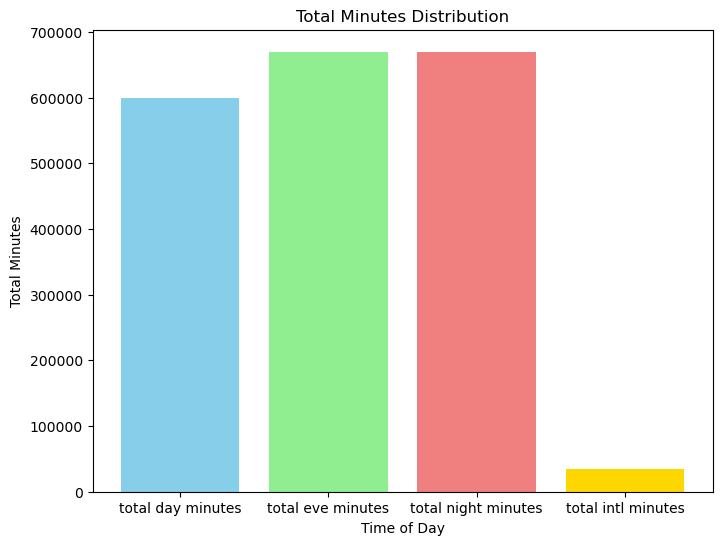

In [476]:

# List of columns to sum
col_sum = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']

# Calculate the sum for each column
sums = data[col_sum].sum()

# Create a bar chart to show the total minutes distribution
plt.figure(figsize=(8, 6))
plt.bar(sums.index, sums, color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])

# Add title and labels
plt.title('Total Minutes Distribution')
plt.xlabel('Time of Day')
plt.ylabel('Total Minutes')

# Show the plot
plt.show()


This bar graph shows the distribution of total minutes across various call categories "total eve minutes" and "total eve minutes"  being the two highest and "total intl minutes" being the lowest  

## Churn Distribution 

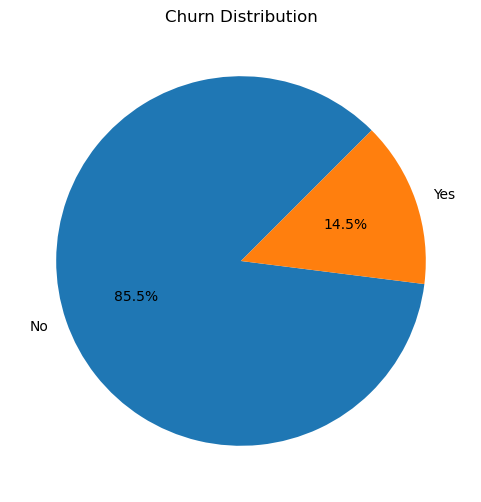

In [477]:
churn_counts = data['churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=45)
plt.title('Churn Distribution')
plt.show()

The pie chart shows that a smaller percentage of customers are churning (leaving) compared to those who remain. This insight is useful for businesses to assess the current level of customer retention and can guide strategies to reduce churn and improve customer satisfaction.

# Churn distribution by state

In [478]:
# Dictionary mapping state initials to full names
state_mapping = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

grouped_df = data.groupby(['state', 'churn']).size().unstack()  # Group by state and churn, then unstack
grouped_df.index = grouped_df.index.map(state_mapping)  # Map state initials to full names
grouped_df['Total'] = grouped_df.sum(axis=1)  # Calculate total number of customers for each state

# Display the DataFrame as a table
display(grouped_df)

churn,0,1,Total
state,,,
Alaska,49,3,52
Alabama,72,8,80
Arkansas,44,11,55
Arizona,60,4,64
California,25,9,34
Colorado,57,9,66
Connecticut,62,12,74
NaN,49,5,54
Delaware,52,9,61


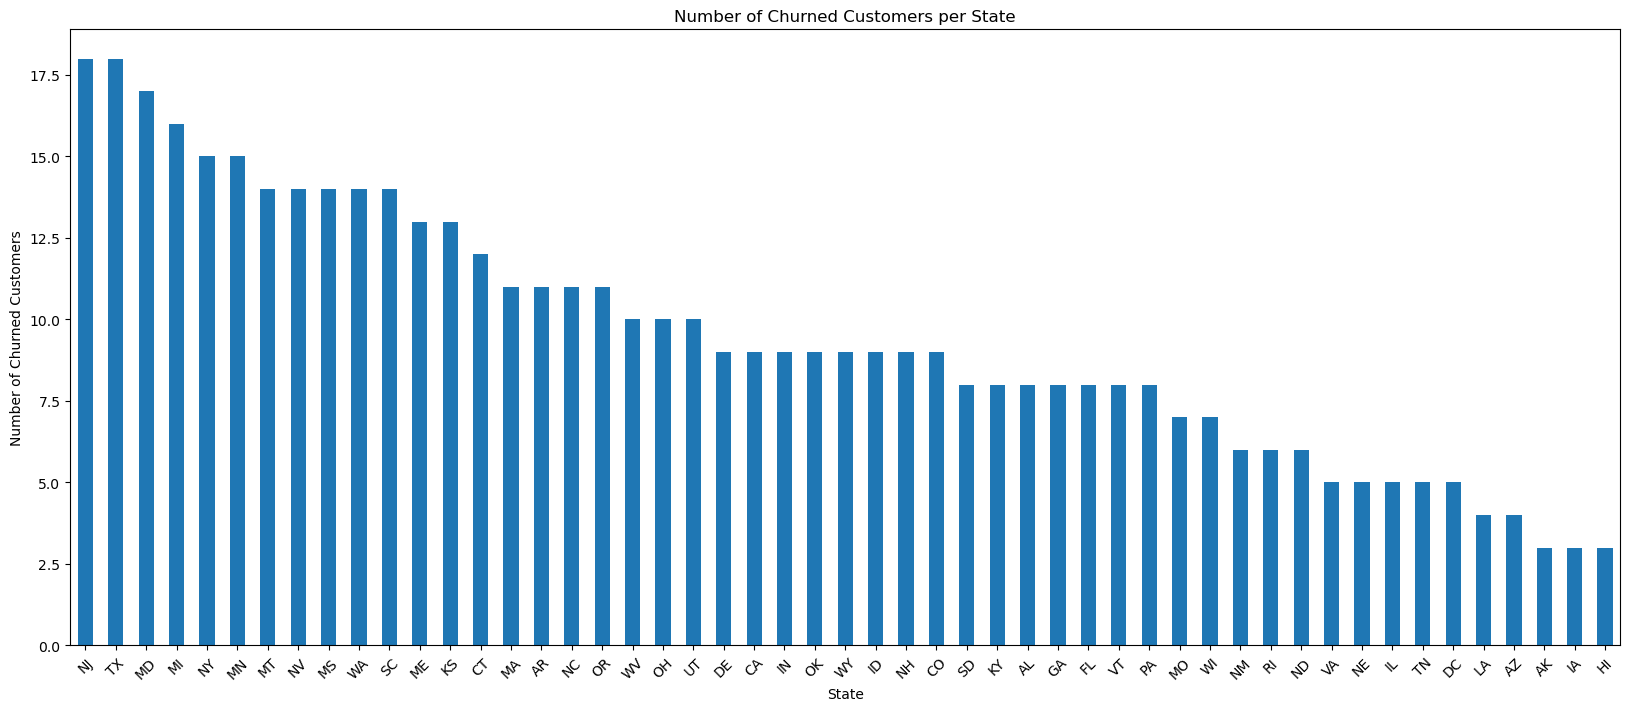

In [479]:
# Filter DataFrame to include only churned customers
churned_df = data[data['churn'] == 1]  
# Count the number of churned customers per state
state_churned_count = churned_df['state'].value_counts()  
# Plotting the number of churned customers per state
plt.figure(figsize=(20, 8))
state_churned_count.plot(kind='bar')
plt.title('Number of Churned Customers per State')
plt.xlabel('State')
plt.ylabel('Number of Churned Customers')
plt.xticks(rotation=45)
plt.show()

New jersey has the highest churn

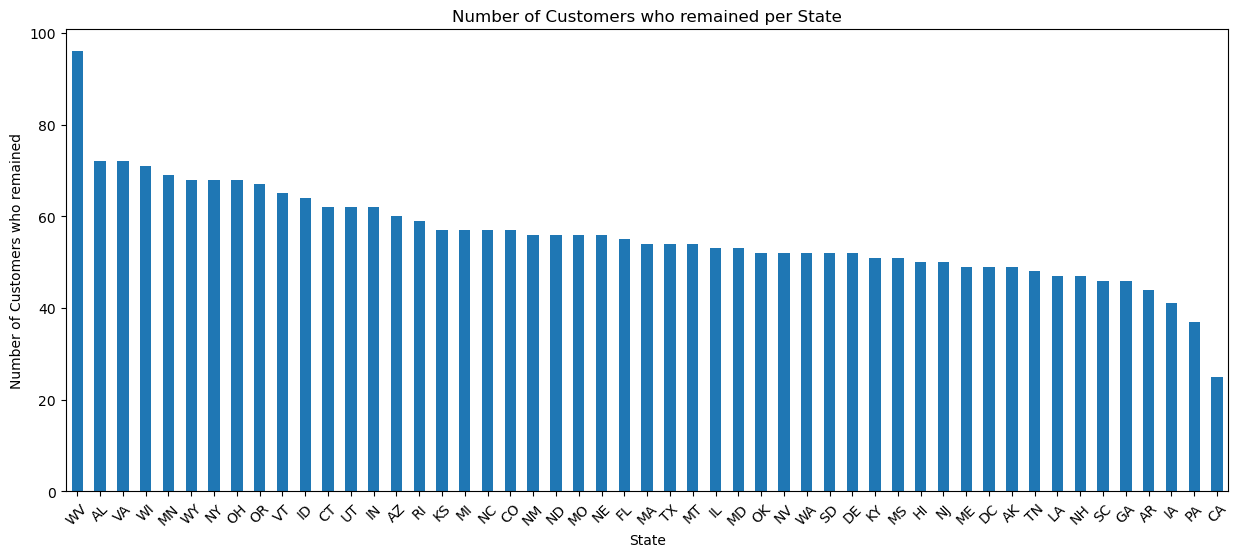

In [421]:
churned_df = data[data['churn'] == 0]  # Filter DataFrame to include only churned customers
state_churned_count = churned_df['state'].value_counts()  # Count the number of churned customers per state

# Plotting the number of churned customers per state
plt.figure(figsize=(15, 6))
state_churned_count.plot(kind='bar')
plt.title('Number of Customers who remained per State')
plt.xlabel('State')
plt.ylabel('Number of Customers who remained')
plt.xticks(rotation=45)
plt.show()

The highest number of customers who stayed is observed in West Virginia.

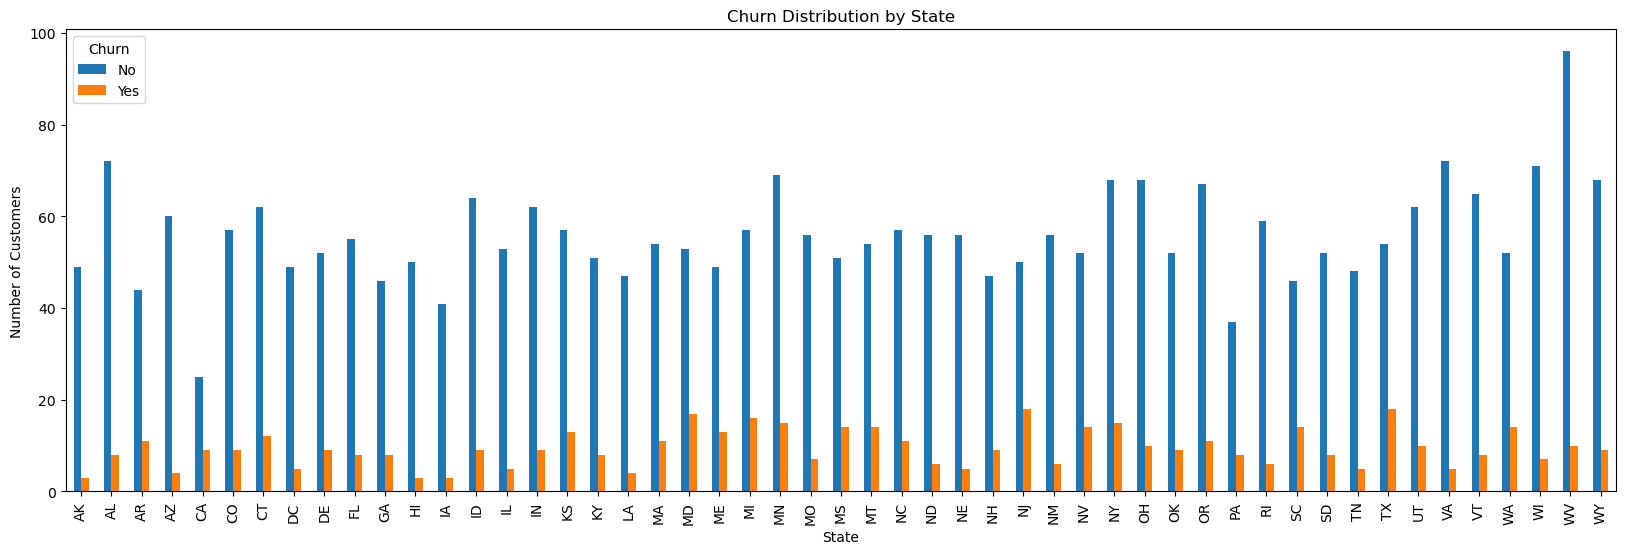

In [482]:
# Plot churn distribution by state
data.groupby(['state', 'churn']).size().unstack().plot(kind='bar', figsize=(20, 6))

plt.title('Churn Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.legend(['No', 'Yes'], title='Churn')
plt.show()

The graph shows that West Virginia has the highest number of customers, coupled with strong retention rates.

## Correlation

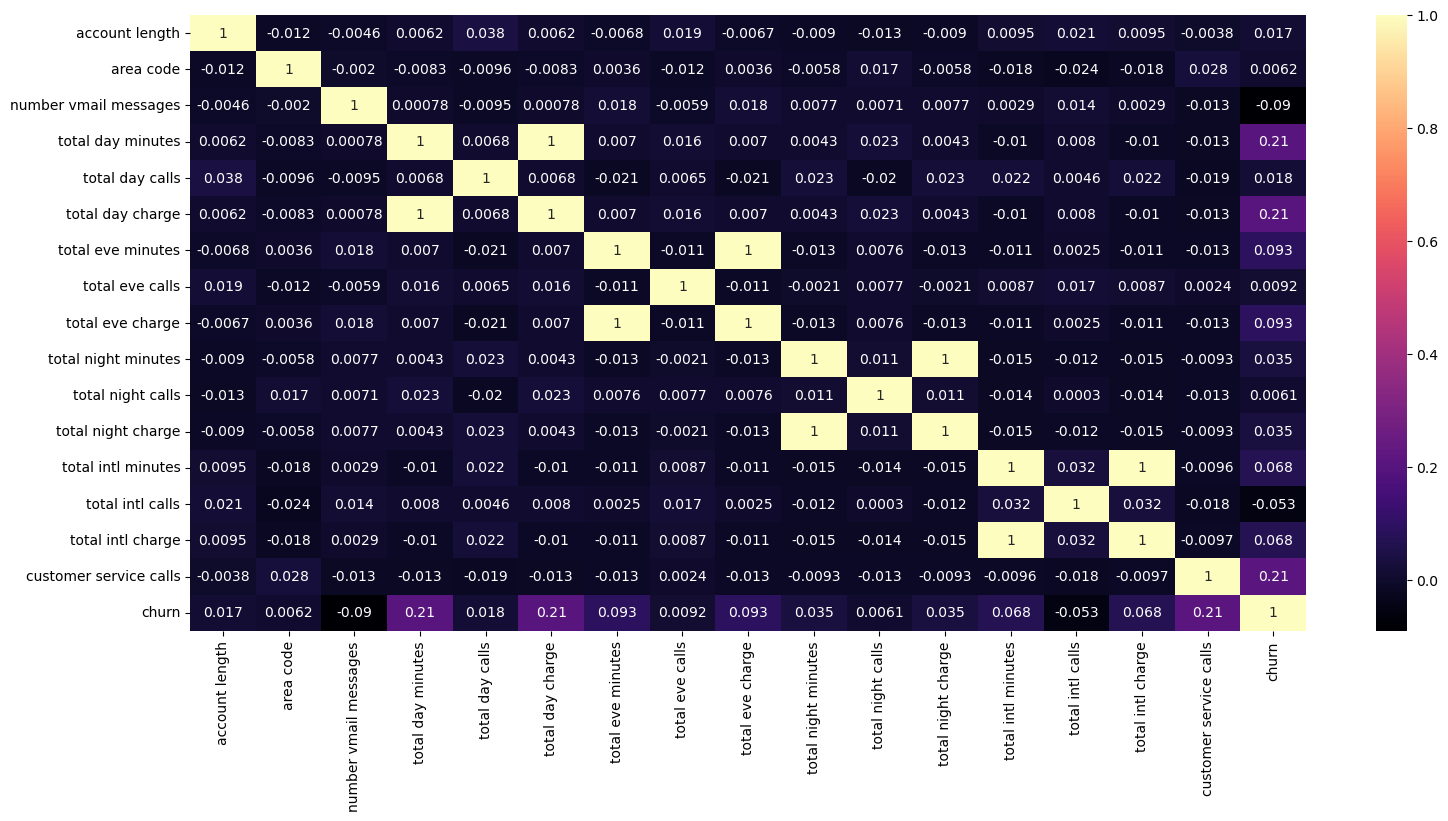

In [483]:
data_new = data.select_dtypes(include=['float64','int64'])
correlation_matrix = data_new.corr()

plt.figure(figsize=(18,8))
sns.heatmap(correlation_matrix, annot = True, cmap='magma')
plt.show()

In [423]:
corr_matrix = data_new.corr()
churn_corr = corr_matrix['churn'].sort_values(ascending=False)
churn_corr

churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64

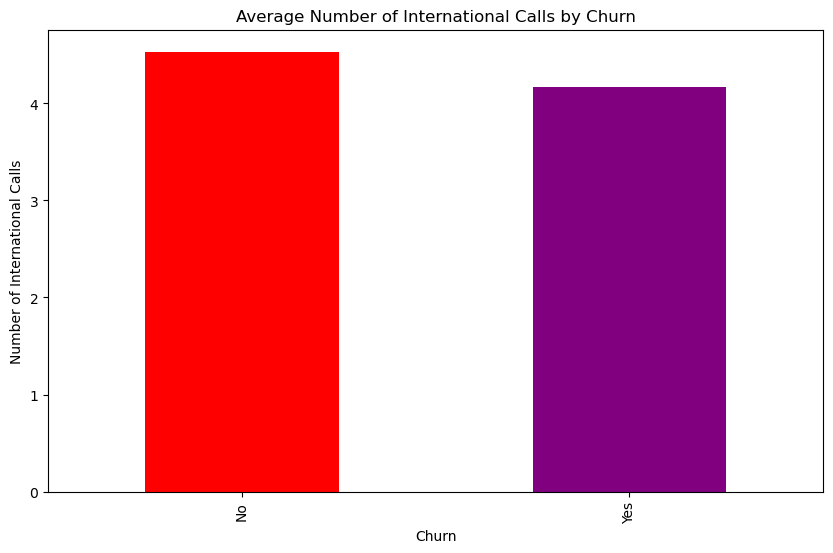

In [467]:
# Calculate average number of international calls for each churn status
total_intl_calls = data.groupby('churn')['total intl calls'].mean() 

plt.figure(figsize=(10, 6))  # Create a new figure with specific size
total_intl_calls.plot(kind='bar', color=['red', 'purple'])  # Create a bar plot
plt.title('Average Number of International Calls by Churn')  # Add title
plt.xlabel('Churn')  # Add label for x-axis
plt.ylabel('Number of International Calls')  # Add label for y-axis


plt.xticks([0, 1], ['No', 'Yes'])  
plt.show()  # Display the plot

The analysis shows that customers who remained with the service made more international calls on average than those who churned. This indicates that international call usage may be linked to customer retention. SyriaTel could leverage this insight to develop strategies that encourage higher international call usage and reduce churn.

## Churn rate by Customer Service Calls

C:\Users\pixel\AppData\Local\Temp\ipykernel_14896\75692189.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='Blues')


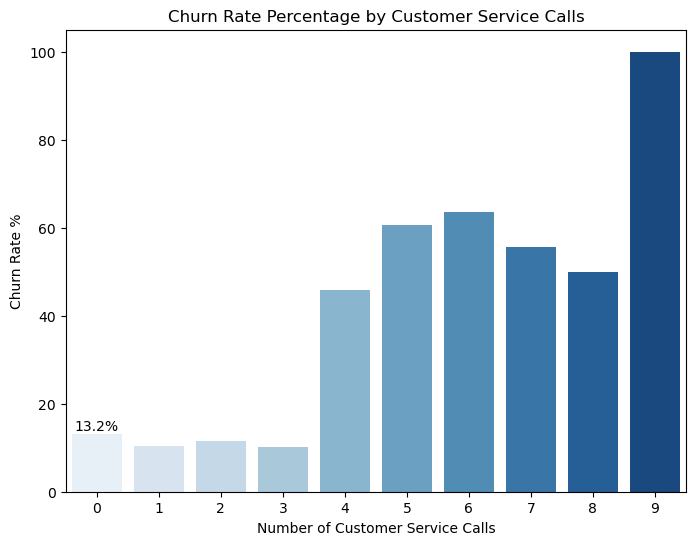

In [468]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate churn rate percentage for each number of customer service calls
churn_rate = data.groupby('customer service calls')['churn'].mean() * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='Blues')

# Add percentage labels to each bar
plt.bar_label(plt.gca().containers[0], fmt='%.1f%%')

# Add title and axis labels
plt.title('Churn Rate Percentage by Customer Service Calls')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Churn Rate %')

# Show the plot
plt.show()


C:\Users\pixel\AppData\Local\Temp\ipykernel_14896\654401110.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='Blues')


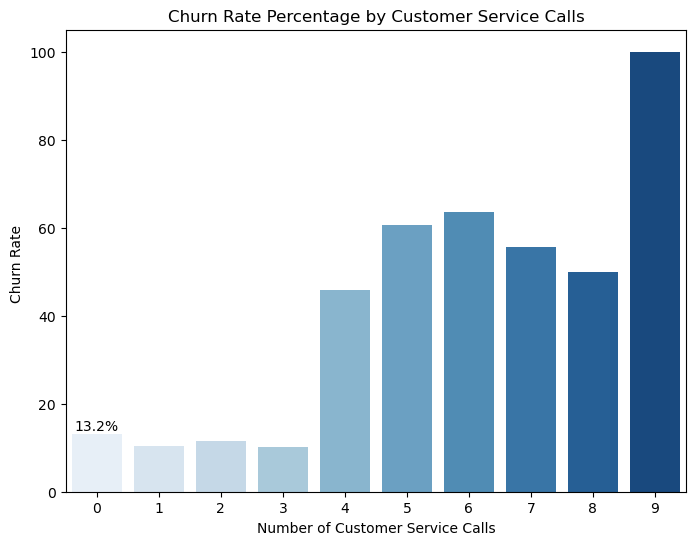

In [469]:
# Calculate churn rate percentage for each number of customer service calls
churn_rate = data.groupby('customer service calls')['churn'].mean() * 100

# Plotting a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='Blues')
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge') # Add % labels


# Adding title and labels
plt.title('Churn Rate Percentage by Customer Service Calls')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Churn Rate ')

# Display the plot
plt.show()

There is a positive correlation between the number of customer service calls and the likelihood of churn.

### Observations about customer service calls and churn:

- As the number of customer service calls increases, the likelihood of churn also rises.
- A significant increase in churn is observed after the 6th customer service call.
- This suggests that after a certain point, additional customer service calls might negatively affect customer retention.
- The sharp rise in churn after the 6th call indicates that this specific interaction could play a key role in customers deciding to leave the service.

## Relationship between Account Length and Churn

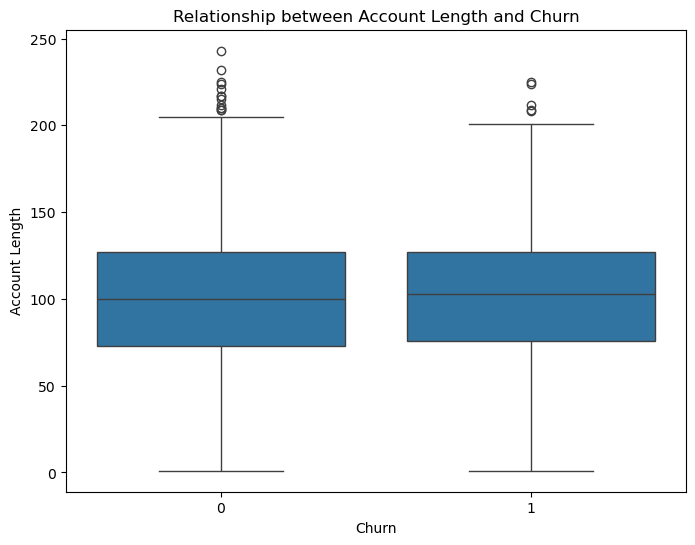

In [427]:
# Box plot
plt.figure(figsize=(8, 6))  # Create a new figure with specific size
sns.boxplot(x='churn', y='account length', data=data)  # Create a box plot
plt.title('Relationship between Account Length and Churn')  # Add title
plt.xlabel('Churn')  # Add label for x-axis
plt.ylabel('Account Length')  # Add label for y-axis
plt.show()  # Display the plot

Customers who have stayed with the company longer tend to churn more than the new customers. The median of 1 is higher than the median of 0 

Feature selection 

In [428]:
churn_corr

churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64

I can drop one of the columns with a 1 correlation (total day minutes and total day charge), (total eve minutes and total eve charge), (total night minutes and total night charge), (total intl minutes and total intl charge) and phone number.

total day charge
total eve charge
total night charge
total intl charge

In [429]:
# drop the columns
cols_drop = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge', 'phone number']
data_1 = data.drop(cols_drop, axis=1)
data_1.head()


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,OH,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,NJ,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,OH,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,OK,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [430]:
data_1['churn'].unique()

array([0, 1], dtype=int64)

In [431]:
# Dummy variables
df = pd.get_dummies(data_1, columns=['state', 'international plan', 'voice mail plan'], drop_first = True)

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   number vmail messages   3333 non-null   int64  
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   total eve minutes       3333 non-null   float64
 6   total eve calls         3333 non-null   int64  
 7   total night minutes     3333 non-null   float64
 8   total night calls       3333 non-null   int64  
 9   total intl minutes      3333 non-null   float64
 10  total intl calls        3333 non-null   int64  
 11  customer service calls  3333 non-null   int64  
 12  churn                   3333 non-null   int64  
 13  state_AL                3333 non-null   bool   
 14  state_AR                3333 non-null   

## Data Modelling

Start with Logistic Regression 

In [433]:
# Y Target Variable
y = df['churn']
X = df.drop('churn', axis = 1)

In [470]:
# Create Scaler Object to standardize

scaler = MinMaxScaler()

# fit and transform
X_scaled = pd.DataFrame(scaler.fit_transform(X))

X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.524793,0.068627,0.490196,0.755701,0.666667,0.542755,0.582353,0.595750,0.408451,0.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.438017,0.068627,0.509804,0.460661,0.745455,0.537531,0.605882,0.621840,0.492958,0.685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.561983,0.068627,0.000000,0.693843,0.690909,0.333242,0.647059,0.374933,0.500000,0.610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.342975,0.000000,0.000000,0.853478,0.430303,0.170195,0.517647,0.467187,0.394366,0.330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.305785,0.068627,0.000000,0.475200,0.684848,0.407754,0.717647,0.440290,0.619718,0.505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [471]:
# perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=37)

# Create a logistic regression model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# fit the model on the training data
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [472]:
# Generate predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [437]:
# Calulate the performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Accuracy
accuracy = accuracy_score(y_test, y_hat_test)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_hat_test)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_hat_test)
print(f"Recall: {recall}")

# F1-score
f1 = f1_score(y_test, y_hat_test)
print(f"F1-score: {f1}")

# False positive rate(fpr) and true positive rate(tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_hat_test)

# calculate the AUC
auc = auc(fpr, tpr)
print(f"AUC: {auc}")

Accuracy: 0.8740629685157422
Precision: 0.5882352941176471
Recall: 0.2222222222222222
F1-score: 0.3225806451612903
AUC: 0.5989793953398806


### Model Evaluation Metrics

- **Accuracy**: Our classifier shows that our model is 85% accurate.
- **Precision**: Out of all the instances our model predicted as positive, approximately 52.94% were actually positive.
- **Recall**: Being approximately 17.82%, it means that out of all the actual positive instances, our model identified approximately 17.82% correctly.
- **F1 Score**: The F1-score provides a balance between precision and recall. In our case, the F1-score is approximately 26.67%.
- **AUC**: The AUC is approximately 0.575, suggesting that our model's ability to distinguish between positive and negative classes is more or less the same as random guessing.

## Confusion Matrix

<Axes: >

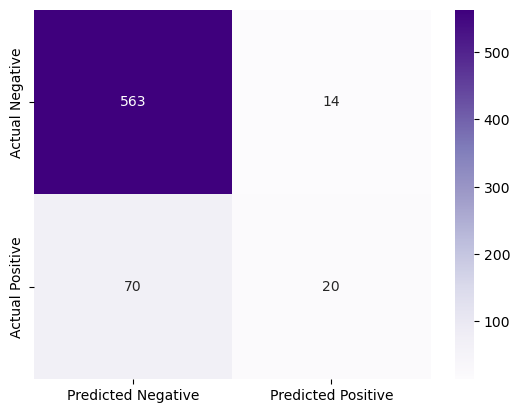

In [484]:
# Build a confusion matrix
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_hat_test)

#  Visualize
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

### Model Prediction Breakdown

- **True Positives**: The model predicted 20 customers would churn, and they did.
- **True Negatives**: The model predicted 563 customers would not churn, and they didn't.
- **False Positives**: The model predicted that 14 customers would churn, but they didn't.
- **False Negatives**: The model incorrectly predicted that 70 customers would not churn, but they actually churned.

In [439]:
# Calculate class distribution
class_counts = df['churn'].value_counts()
majority_class = class_counts.idxmax()
majority_count = class_counts.max()

# Check for imbalance. Threshold for imbalance --> 0.8
if majority_count / len(df) > 0.8:  
    print('df is imbalanced.')
else:
    print('df is balanced.')

df is imbalanced.


Given the imbalance in the data, use Decision Trees. This can handle imbalanced data better than Linear Regression because they consider class distributions during splits, making them suitable for classification tasks.

### Decision Trees 

In [473]:
from sklearn.tree import DecisionTreeClassifier
# Instantiate DecisionTreeClassifier
dec_clf = DecisionTreeClassifier(random_state=30)

In [474]:
#Fit on the training data
dec_clf.fit(X_train, y_train)

#predict on the test set
dt_y_pred = dec_clf.predict(X_test)

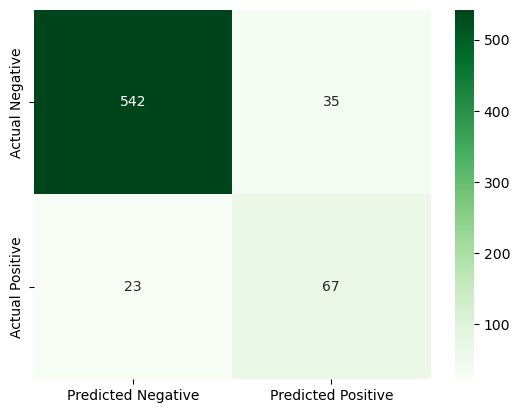

In [475]:
c_m= confusion_matrix(y_test, dt_y_pred)
# Visualize the confusion matrix
sns.heatmap(c_m, annot=True, fmt="d",  cmap='Greens',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.show()

### Model Prediction Summary

- The model correctly predicted:
  - **542 negative cases**.
  - **67 positive cases**.
- The model incorrectly predicted:
  - **35 positive cases as negative**.
  - **23 negative cases as positive**.

In [458]:
# Calculate accuracy
accuracy = accuracy_score(y_test, dt_y_pred)
print(f"Accuracy: {accuracy}")

# Calculate F1-score
f1 = f1_score(y_test, dt_y_pred)
print(f"F1-score: {f1}")


Accuracy: 0.9130434782608695
F1-score: 0.6979166666666666


In [444]:
# Make predictions on the test
y_pred_LR = logreg.predict(X_test)

# Calculate probability predictions for the positive class
# Assuming positive class is at index 1
lr_predictions_proba = logreg.predict_proba(X_test)[:, 1]  

In [445]:
# Calculate probability predictions for the positive class for decision tree
dec_clf.fit(X_train, y_train)
dt_predictions_proba = dec_clf.predict_proba(X_test)[:, 1]

In [446]:
# Calculate probability predictions for the positive class for decision tree
dec_clf.fit(X_train, y_train)
dt_predictions_proba = dec_clf.predict_proba(X_test)[:, 1]

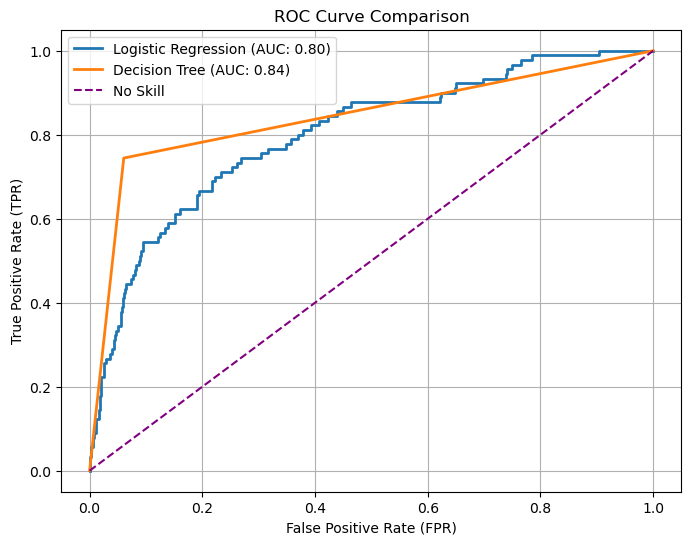

In [462]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# ROC curve calculation and plot
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_predictions_proba)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_predictions_proba)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC: {:.2f})'.format(roc_auc_lr), 
         linewidth=2)

plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC: {:.2f})'.format(roc_auc_dt), 
         linewidth=2)

plt.plot([0, 1], [0, 1], linestyle='--', color='purple', label='No Skill')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


## Conclusion

The churn prediction analysis conducted for SyriaTel aimed to build a reliable classifier to identify customers at risk of terminating their services. Through extensive data exploration, preparation, and modeling, several key insights emerged:

- **Model Performance**: Random Forest demonstrated the highest effectiveness for churn prediction, outperforming Logistic Regression and Decision Trees. Its superior accuracy and predictive power make it the ideal choice for SyriaTel's churn prediction system.

- **Key Predictive Features**: Total day minutes, customer service calls, and subscription to the international plan were identified as the most significant indicators of churn. These insights can help SyriaTel design proactive retention strategies focused on high-risk customers.


### Recommendations

Here are some recommendations:

- **Improve Call Quality**: Invest in infrastructure and advanced technology to enhance call quality, ensuring a superior customer experience.

- **Enhance Customer Service**: Reduce response times, streamline issue resolution processes, and provide personalized support to improve customer satisfaction.

- **Offer Tailored Plans for International Subscribers**: Develop attractive plans and special offers aimed at international subscribers to boost satisfaction and decrease churn rates.

- **Implement Proactive Retention Strategies**: Use targeted promotions, loyalty rewards, and personalized communication to engage and retain customers at risk of churning.

- **Conduct Regular Analysis**: Continuously monitor customer behavior and churn trends, updating predictive models and retention strategies to align with evolving market conditions.
